In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as sps
import math
%matplotlib inline

In [64]:
# Посчитаем плотность
grid = np.mgrid[-10:10:0.05, -10:10:0.05]
density = np.array(
    [[sps.multivariate_normal.pdf(  (grid[0, i, j], grid[1, i, j]),
                                    mean=[0, 0],
                                    cov=[[10, 8], [8, 10]])
    for i in range(grid[0].shape[0])] for j in range(grid[0].shape[1])])

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


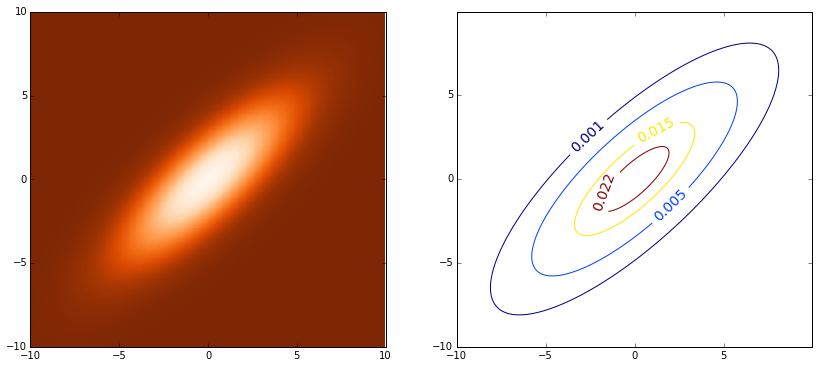

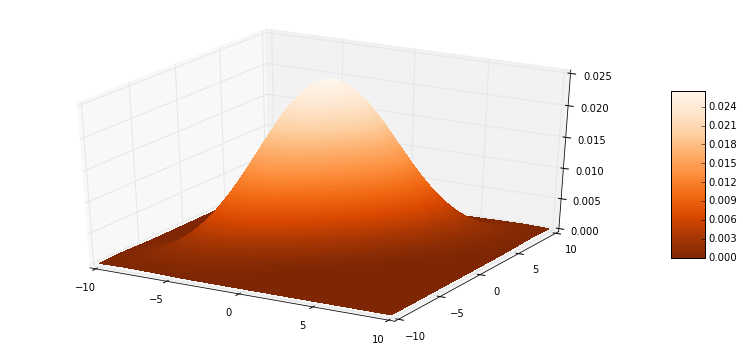

In [65]:
# Нарисуем несколько графиков для наглядности
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges_r')

plt.subplot(1, 2, 2)
CS = plt.contour(grid[0], grid[1], density, [0.001, 0.005, 0.015, 0.022])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
plt.show()

fig = plt.figure(figsize=(14, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1,
                       cmap='Oranges_r', linewidth=0, antialiased=False)
ax.set_zlim(0, 0.025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Графики плотности вектора $(\xi_1, \xi_2) \sim \mathscr{N} \left( \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix} \right)$

Воспольхуемся тем, что
$f_{\xi_1|\xi_2}(x | y) = \frac{f_{\xi_1, \xi_2}(x, y)}{f_{\xi_2}(y)}$

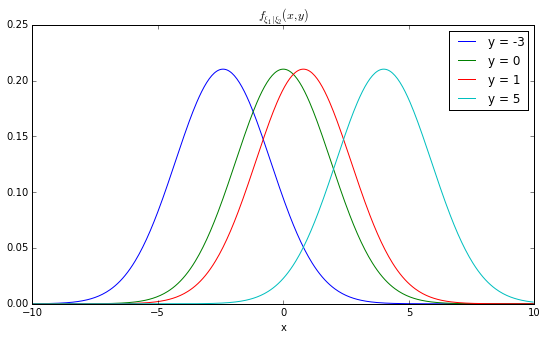

In [66]:
# Распределение (Xi1, Xi2)
distr2d = sps.multivariate_normal(mean=[0, 0], cov=[[10, 8], [8, 10]])
# Распределени Xi2
distr1d = sps.norm(0, np.sqrt(10))

X = np.mgrid[-10:10:0.05]

# Построим графики
plt.figure(figsize=(9, 5))
plt.title('$f_{\\xi_1|\\xi_2}(x, y)$')
plt.xlabel('x')

for y in [-3, 0, 1, 5]:
    z = []
    for x in X:
        z.append(distr2d.pdf([x, y]) / distr1d.pdf(y))
    plt.plot(X, np.array(z), label='y = ' + str(y))
    
plt.legend()
plt.show()

$5\xi_1-4\xi_2 \perp \xi_2$ (т.к $Cov(5\xi_1-4\xi_2, \xi_2) = 0$)

$E(\xi_1 | \xi_2) = \frac{1}{5}E((5\xi_1 - 4\xi_2) + 4\xi_2 | \xi_2) = \frac{1}{5}E(5\xi_1 - 4\xi_2) + \frac{4}{5}\xi_2 = \frac{4}{5}\xi_2$

$E(\xi_1) = 0$

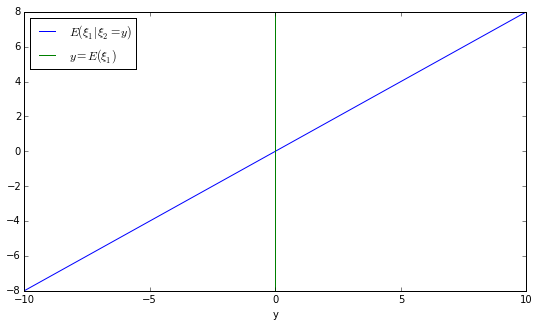

In [68]:
Y = (4.0 / 5.0) * X

# Построим графики
plt.figure(figsize=(9, 5))
plt.xlabel('y')
plt.plot(X, Y, label='$E(\\xi_1 | \\xi_2 = y)$')
# Вот тут на самом деле не очень понятно, какую прямую от нас хотят в задании
# Потому что горизонтальная ось - y, а нужна прямая x = E(Xi1)
# Будем считать, что под x подразумевали горизонтальную ось
Y = np.mgrid[-8:8:0.05]
plt.plot(np.zeros(len(Y)), Y, label='$y = E(\\xi_1)$')
plt.legend(loc='best')
plt.show()